## Кластеризация методом k-средних

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn import decomposition
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from math import sqrt
from pandas import DataFrame

In [32]:
class kMeans():
    def __init__(self, k=2, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.kmeans_centroids = []
 
    def fit(self, data):
        n_samples, n_features = np.shape(data)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = data[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        for _ in range(self.max_iter):
            n_samples = np.shape(data)[0]
            clusters = [[] for _ in range(self.k)]
            for sample_i, sample in enumerate(data):
                closest_i = None
                closest_distance = float("inf")
                for i, centroid in enumerate(centroids):
                    distance = np.linalg.norm(sample - centroid)
                    if distance < closest_distance:
                        closest_i = i
                        closest_distance = distance
                clusters[closest_i].append(sample_i)
            self.clusters = clusters
            prev_centroids = centroids
            n_features = np.shape(data)[1]
            centroids = np.zeros((self.k, n_features))
            for i, cluster in enumerate(clusters):
                centroid = np.mean(data[cluster], axis=0)
                centroids[i] = centroid    
            diff = centroids - prev_centroids
            if not diff.any():
                break
        self.kmeans_centroids = centroids
        return centroids

    def predict(self, data):  
        clusters = self.clusters
        predicted_labels = np.zeros(np.shape(data)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                predicted_labels[sample_i] = cluster_i            
        return predicted_labels

In [13]:
iris = load_iris()

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris.data.shape

(150, 4)

In [16]:
iris.target.shape

(150,)

In [37]:
train_data = np.array(iris.data)
train_labels = np.array(iris.target)
num_features = train_data.data.shape[1]

pca = decomposition.PCA(n_components=3)
pca.fit(train_data)
train_data = pca.transform(train_data)

In [40]:
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)
model = kMeans(k=num_classes, max_iter=1000)
centroids = model.fit(train_data)
predicted_labels = model.predict(train_data)

In [41]:
predicted_labels

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

Text(0.5, 1.0, 'k-means clustering')

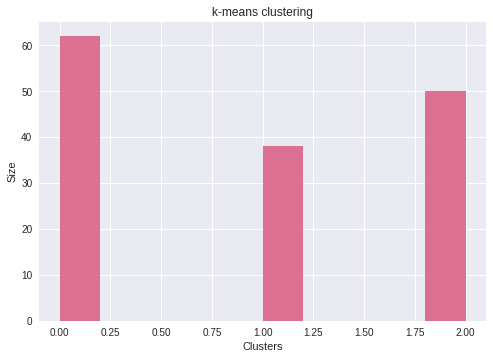

In [91]:
x = predicted_labels.reshape(-1,1)
df = pd.DataFrame.from_records(x)
df.hist(color = 'palevioletred')
plt.ylabel('Size')
plt.xlabel('Clusters')
plt.title('k-means clustering')